<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_1X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_5_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_1X/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n250.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n20.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,86.067866,0.125999,96.193866,95.991182,0.202684
1,0.0,1.0,69.844040,0.363369,80.207410,79.891952,0.315458
2,0.0,2.0,48.988212,0.334427,59.322639,59.196293,0.126345
3,0.0,3.0,92.657922,-0.209182,102.448740,102.530626,-0.081886
4,0.0,4.0,24.035203,0.175527,34.210730,34.434920,-0.224190
...,...,...,...,...,...,...,...
19995,999.0,15.0,70.058661,0.703738,80.762399,80.082160,0.680239
19996,999.0,16.0,89.409631,-0.527057,98.882574,99.631195,-0.748622
19997,999.0,17.0,25.897359,-0.491070,35.406289,35.468850,-0.062561
19998,999.0,18.0,92.613436,0.876963,103.490399,102.867793,0.622607


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    86.067866  0.125999   96.193866   95.991182  0.202684
      1.0    69.844040  0.363369   80.207410   79.891952  0.315458
      2.0    48.988212  0.334427   59.322639   59.196293  0.126345
      3.0    92.657922 -0.209182  102.448740  102.530626 -0.081886
      4.0    24.035203  0.175527   34.210730   34.434920 -0.224190
...                ...       ...         ...         ...       ...
999.0 15.0   70.058661  0.703738   80.762399   80.082160  0.680239
      16.0   89.409631 -0.527057   98.882574   99.631195 -0.748622
      17.0   25.897359 -0.491070   35.406289   35.468850 -0.062561
      18.0   92.613436  0.876963  103.490399  102.867793  0.622607
      19.0   58.256353 -0.265849   67.990505   68.159051 -0.168547

[20000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    86.067866  0.125999   96.193866   95.991182  0.202684
      1.0    69.844040  0.363369   80.207410   79.891952  0.315458
      2.0    48.988212  0.334427   59.322639   59.196293  0.126345
      3.0    92.657922 -0.209182  102.448740  102.530626 -0.081886
      4.0    24.035203  0.175527   34.210730   34.434920 -0.224190
...                ...       ...         ...         ...       ...
999.0 15.0   70.058661  0.703738   80.762399   80.082160  0.680239
      16.0   89.409631 -0.527057   98.882574   99.631195 -0.748622
      17.0   25.897359 -0.491070   35.406289   35.468850 -0.062561
      18.0   92.613436  0.876963  103.490399  102.867793  0.622607
      19.0   58.256353 -0.265849   67.990505   68.159051 -0.168547

[20000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,86.067866,0.125999,96.193866,95.991182,0.202684
1,0.0,1.0,69.844040,0.363369,80.207410,79.891952,0.315458
2,0.0,2.0,48.988212,0.334427,59.322639,59.196293,0.126345
3,0.0,3.0,92.657922,-0.209182,102.448740,102.530626,-0.081886
4,0.0,4.0,24.035203,0.175527,34.210730,34.434920,-0.224190
...,...,...,...,...,...,...,...
19995,999.0,15.0,70.058661,0.703738,80.762399,80.082160,0.680239
19996,999.0,16.0,89.409631,-0.527057,98.882574,99.631195,-0.748622
19997,999.0,17.0,25.897359,-0.491070,35.406289,35.468850,-0.062561
19998,999.0,18.0,92.613436,0.876963,103.490399,102.867793,0.622607


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    86.067866  0.125999   96.193866   95.991182  0.202684
      1.0    69.844040  0.363369   80.207410   79.891952  0.315458
      2.0    48.988212  0.334427   59.322639   59.196293  0.126345
      3.0    92.657922 -0.209182  102.448740  102.530626 -0.081886
      4.0    24.035203  0.175527   34.210730   34.434920 -0.224190
...                ...       ...         ...         ...       ...
999.0 15.0   70.058661  0.703738   80.762399   80.082160  0.680239
      16.0   89.409631 -0.527057   98.882574   99.631195 -0.748622
      17.0   25.897359 -0.491070   35.406289   35.468850 -0.062561
      18.0   92.613436  0.876963  103.490399  102.867793  0.622607
      19.0   58.256353 -0.265849   67.990505   68.159051 -0.168547

[20000 rows x 5 columns]

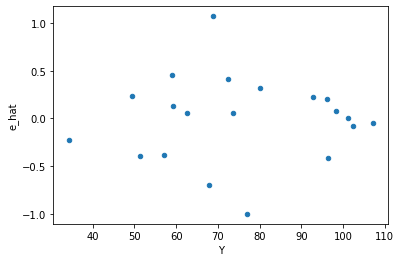

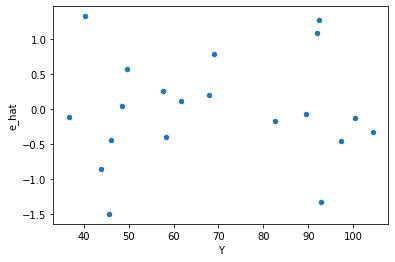

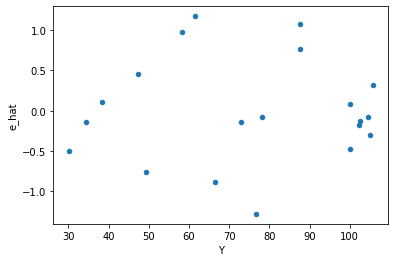

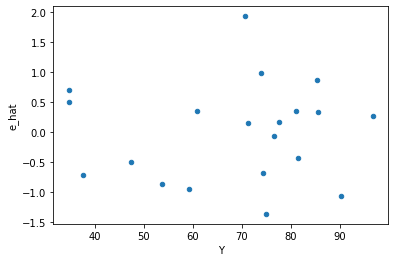

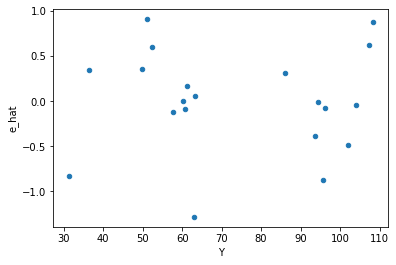

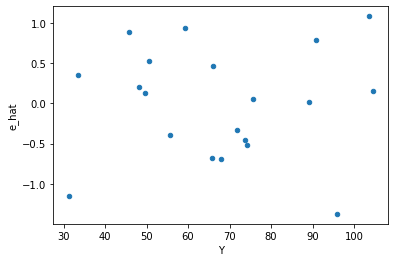

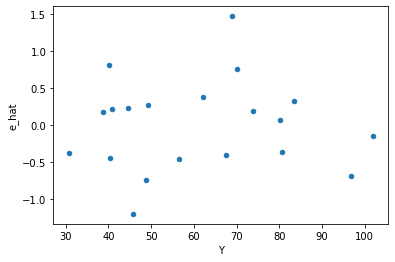

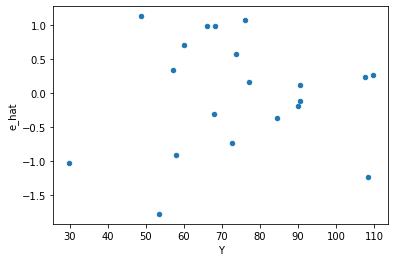

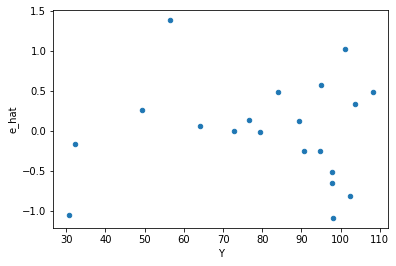

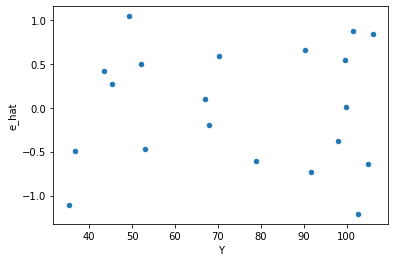

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew1.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew2.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew3.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew4.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew5.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew6.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew7.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew8.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew9.plot(x ='Y', y='e_hat', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,12.0,0.256031999129514,3.5444722908034927,0.042671999854919006,0.29537269090029106,6.921932224984342,0.004642961959972602,0.9976785190200137,0.002321480979986301,Reject001=0 : Heteroscedasticity
1.0,11.0,7.0,6.004363812099984,4.544204679793183,0.5458512556454531,0.6491720971133119,1.1892838761462314,0.8466655038346866,0.5766672480826567,0.4233327519173433,Reject001=1 : Homoscedasticity
2.0,11.0,7.0,3.8600811090123033,4.01031305865429,0.35091646445566393,0.5729018655220415,1.6325875914962205,0.5285269574685796,0.7357365212657102,0.2642634787342898,Reject001=1 : Homoscedasticity
3.0,6.0,12.0,2.2672345016985833,8.470583896654471,0.37787241694976387,0.7058819913878726,1.8680431799861057,0.336144270747067,0.8319278646264665,0.1680721353735335,Reject001=1 : Homoscedasticity
6.0,8.0,10.0,2.389452241982986,3.4416173005098676,0.29868153024787325,0.34416173005098677,1.152269876765965,0.8172138564319593,0.5913930717840203,0.40860692821597966,Reject001=1 : Homoscedasticity
7.0,6.0,12.0,1.5740576593466369,9.762965211393121,0.26234294322443946,0.8135804342827601,3.1012095247659333,0.0901374603303906,0.9549312698348047,0.0450687301651953,Reject001=1 : Homoscedasticity
13.0,12.0,6.0,2.143192974653413,4.107566166797163,0.17859941455445108,0.6845943611328605,3.8331276888040557,0.11010651492738255,0.9449467425363087,0.055053257463691274,Reject001=1 : Homoscedasticity
16.0,8.0,10.0,4.129103912419139,5.629834704505972,0.5161379890523924,0.5629834704505972,1.090761545152317,0.8797147383502155,0.5601426308248922,0.43985736917510776,Reject001=1 : Homoscedasticity
18.0,9.0,9.0,3.7286123410490424,4.046701002784664,0.4142902601165603,0.44963344475385153,1.0853101992485834,0.9049385176469036,0.5475307411765482,0.4524692588234518,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,12.0,0.256031999129514,3.5444722908034927,0.042671999854919006,0.29537269090029106,6.921932224984342,0.004642961959972602,Reject001=0 : Heteroscedasticity
1.0,11.0,7.0,6.004363812099984,4.544204679793183,0.5458512556454531,0.6491720971133119,1.1892838761462314,0.8466655038346866,Reject001=1 : Homoscedasticity
2.0,11.0,7.0,3.8600811090123033,4.01031305865429,0.35091646445566393,0.5729018655220415,1.6325875914962205,0.5285269574685796,Reject001=1 : Homoscedasticity
3.0,6.0,12.0,2.2672345016985833,8.470583896654471,0.37787241694976387,0.7058819913878726,1.8680431799861057,0.336144270747067,Reject001=1 : Homoscedasticity
4.0,10.0,8.0,3.7720954285501644,2.140518222225497,0.37720954285501646,0.2675647777781871,0.7093266404477677,0.5995469609113105,Reject001=1 : Homoscedasticity
5.0,11.0,7.0,4.772843466472567,2.6989071419526396,0.4338948605884152,0.38555816313609137,0.8885981332280053,0.8258847293276695,Reject001=1 : Homoscedasticity
6.0,8.0,10.0,2.389452241982986,3.4416173005098676,0.29868153024787325,0.34416173005098677,1.152269876765965,0.8172138564319593,Reject001=1 : Homoscedasticity
7.0,6.0,12.0,1.5740576593466369,9.762965211393121,0.26234294322443946,0.8135804342827601,3.1012095247659333,0.0901374603303906,Reject001=1 : Homoscedasticity
8.0,4.0,14.0,1.850375174757503,4.5795319686579745,0.46259379368937575,0.32710942633271245,0.7071202225258585,0.7994553216396552,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      974
Reject001=0 : Heteroscedasticity     26
Name: Result_test, dtype: int64